### Locate the first nontrivial root of sin x = x<sup>3</sup> where x is in radians.
#### (a) Use graphical technique

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# define data points of x-axis and y-axis
# x1 y1 -> y = 0
# x2 y2 -> y = sin(x)
# x3 y3 -> y = x^3
# x4 y4 -> x = approximate value

x1 = np.linspace(-5, 5, 100)
y1 = np.sin(x1)

x2 = np.linspace(-5, 5, 100)
y2 = np.linspace(0, 0, 100)

x3 = np.linspace(-5, 5, 100)
y3 = np.power(x3, 3)

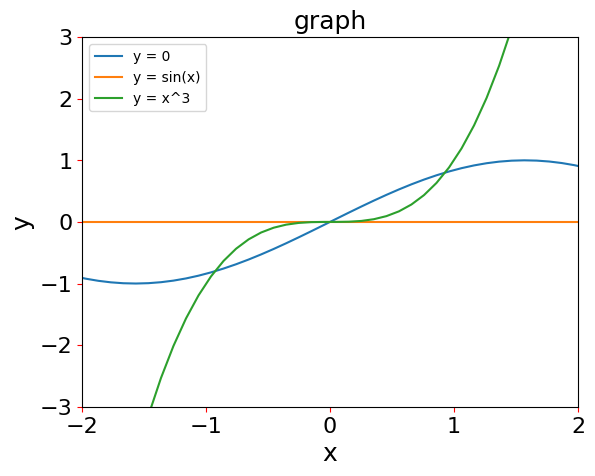

In [48]:
fig1 = plt.figure()
#------------------------------------------
axes1 = fig1.add_subplot(111)

func1, = axes1.plot(x1, y1, label="y = 0")
func2, = axes1.plot(x2, y2, label="y = sin(x)")
func3, = axes1.plot(x3, y3, label="y = x^3")

plt.title("graph", fontsize=18)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(handles=[func1, func2, func3], loc="best")

plt.tick_params(axis="both", labelsize=16, color="red")
plt.axis([-2, 2, -3, 3]) #x-axis show 0~8, y-axis show 0~70

#------------------------------------------
plt.show()

#### (b) Bisection program (xl = 0.5, xu = 1, when  $\epsilon a$ < $\epsilon s$ = 2%)

In [49]:
# data
ea = 1    # approximate relative error
es = 0.02 # tolerance

xl = 0.5  # lower bond of x
xu = 1    # upper bond of x

xr_before = 0
xr_current = (xl + xu) / 2


# function definition
def func(x):
    return np.sin(x) - np.power(x, 3)

def x_range_decision(xl_local, xu_local):
    xr_local = (xl_local + xu_local) / 2

    judgement = func(xl_local) * func(xr_local)
    if judgement < 0:
        return xl_local, xr_local # xu <- xr
    elif judgement > 0:
        return xr_local, xu_local # xl <- xr
    else:
        if func(xl_local) == 0:
            return xl_local, xl_local # xl_local is an answer
        else:
            return xr_local, xr_local # xr_local is an answer

# run
while ea > es:
    xr_before = xr_current
    #-------------------------------------- a new iteration
    xl, xu = x_range_decision(xl, xu)
    xr_current = (xl + xu) / 2

    ea = abs((xr_current - xr_before) / xr_current)

print("approximate value: %f" % xr_current)
print("true value:        0.9286263")
print("approximate relative error: %f" % ea)

approximate value: 0.921875
true value:        0.9286263
approximate relative error: 0.016949


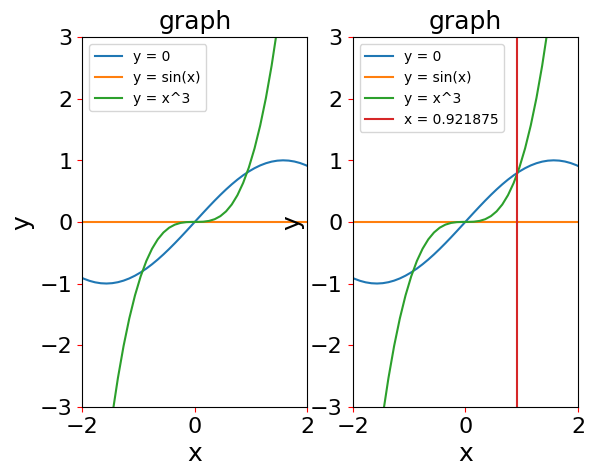

In [53]:
#data
x4 = np.linspace(xr_current, xr_current, 100)
y4 = np.linspace(-3, 3, 100)

#------------------------------------------
fig2 = plt.figure()

#------------------------------------------
axes1 = fig2.add_subplot(121)

func1, = axes1.plot(x1, y1, label="y = 0")
func2, = axes1.plot(x2, y2, label="y = sin(x)")
func3, = axes1.plot(x3, y3, label="y = x^3")

plt.title("graph", fontsize=18)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.legend(handles=[func1, func2, func3], loc="best")

plt.tick_params(axis="both", labelsize=16, color="red")
plt.axis([-2, 2, -3, 3]) #x-axis show 0~8, y-axis show 0~70


axes2 = fig2.add_subplot(122)

func1, = axes2.plot(x1, y1, label="y = 0")
func2, = axes2.plot(x2, y2, label="y = sin(x)")
func3, = axes2.plot(x3, y3, label="y = x^3")
func4, = axes2.plot(x4, y4, label="x = " + str(xr_current))

plt.title("graph", fontsize=18)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(handles=[func1, func2, func3, func4], loc="best")

plt.tick_params(axis="both", labelsize=16, color="red")
plt.axis([-2, 2, -3, 3]) #x-axis show -2~2, y-axis show -3~3

#------------------------------------------
plt.show()